In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [3]:
event1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/First_Health_Camp_Attended.csv')
event2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Second_Health_Camp_Attended.csv')
event3 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Third_Health_Camp_Attended.csv')
patient_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/D7.csv')
patient_df1 = patient_df.copy()

In [4]:
patient_df1['Patient_ID'].unique

<bound method Series.unique of 0        516956
1        507733
2        508307
3        512612
4        521075
          ...  
37628    518600
37629    509515
37630    510713
37631    493667
37632    498051
Name: Patient_ID, Length: 37633, dtype: int64>

In [5]:
#X3a.to_csv('/home/allen/Galva/capstones/capstone2/data/D7.csv') 

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.dpi'] = 200

In [7]:
checker = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Patient_and_Target.csv')

In [8]:
v1 = patient_df1['Event1_or_2'].values
v1_count1 = [x for x in v1 if x==1]
v1_count0 = [1 for x in v1 if x==0]

In [9]:
v11 = sum(v1_count1)
v10 = sum(v1_count0)
print(v10,v11)

26565 11068


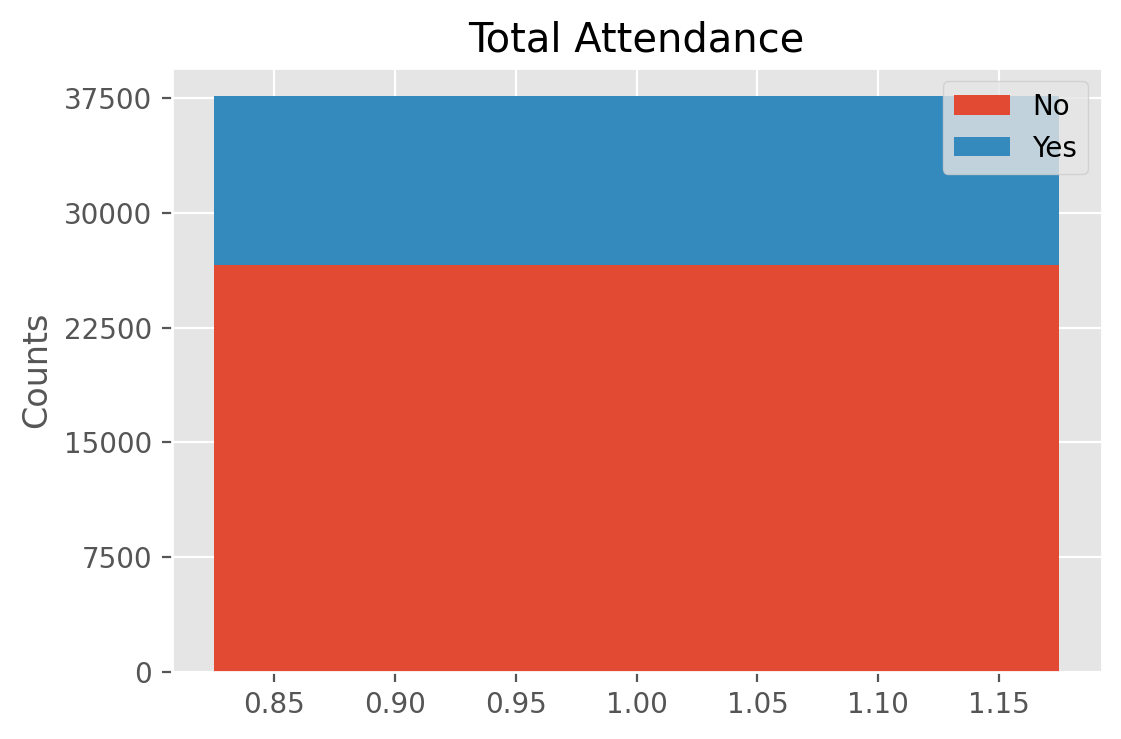

In [10]:

N = 1
yes = (11068)
no = (26565)
ind = 1    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width,
             bottom=no)

plt.ylabel('Counts')
plt.title('Total Attendance')

plt.yticks(np.arange(0, 45000 , 7500))
plt.legend(('No', 'Yes'))

plt.show()

In [11]:
edu = patient_df1['Education_Score2'].values
edu_ = []
for i in edu:
    if i >=90 :
        edu_.append(2)
    elif i >=80 and i<90:
        edu_.append(1)
    else:
        edu_.append(0)

In [12]:
len(edu_)

37633

In [13]:
t = patient_df1['Education_Scorez'].values
t2 = np.array(t)

In [14]:
patient_df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Job_Type,Event1_or_2,Education_Score2,Education_Scorez,2,3,4,5,6,7,8,9,10,11,12,13,14,9999,B,C,D,E,F,G,H,I,Z
0,0,0,0,516956,0,0,0,0,1,0,1,18-Jun-03,Z,Software Industry,1,1,90.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,507733,0,0,0,0,1,0,1,20-Jul-03,H,Software Industry,1,0,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2,2,508307,0,0,0,0,3,0,1,02-Nov-02,D,BFSI,2,1,87.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,3,3,512612,0,0,0,0,1,0,1,02-Nov-02,D,Education,3,1,75.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,4,4,521075,0,0,0,0,3,0,1,24-Nov-02,H,Others,4,1,50.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
patient_df1['Edu1'] = patient_df1['Education_Scorez'].apply(lambda x:1 if x == 1 else 0)
patient_df1['Edu2'] = patient_df1['Education_Scorez'].apply(lambda x:1 if x == 2 else 0)

In [16]:
patient_df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Job_Type,Event1_or_2,Education_Score2,Education_Scorez,2,3,4,5,6,7,8,9,10,11,12,13,14,9999,B,C,D,E,F,G,H,I,Z,Edu1,Edu2
0,0,0,0,516956,0,0,0,0,1,0,1,18-Jun-03,Z,Software Industry,1,1,90.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,1,1,507733,0,0,0,0,1,0,1,20-Jul-03,H,Software Industry,1,0,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,2,2,508307,0,0,0,0,3,0,1,02-Nov-02,D,BFSI,2,1,87.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3,3,3,512612,0,0,0,0,1,0,1,02-Nov-02,D,Education,3,1,75.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,4,4,521075,0,0,0,0,3,0,1,24-Nov-02,H,Others,4,1,50.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
train = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/Train/Train.csv')
train1 = train.copy()
test_df = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/test.csv') 
test_df1 = test_df.copy() 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [19]:
train1_1 = train1['Var1'].to_frame()
train1_2 = train1['Var2'].to_frame()
train1_3 = train1['Var3'].to_frame() 
train1_4 = train1['Var4'].to_frame() 
train1_5 = train1['Var5'].to_frame() 

In [20]:
train1_1 = scaler.fit_transform(train1_1 )
train1_2 = scaler.fit_transform(train1_2 )
train1_3 = scaler.fit_transform(train1_3 )
train1_4 = scaler.fit_transform(train1_4 )
train1_5 = scaler.fit_transform(train1_5 )  

In [21]:
train1['train1_1'] = train1_1
train1['train1_2'] = train1_2
train1['train1_3'] = train1_3
train1['train1_4'] = train1_4
train1['train1_5'] = train1_5

In [22]:
train1.drop(['Var1','Var2','Var3','Var4','Var5']  , axis=1, inplace=True)

In [23]:
test1df1 = test_df1['Var1'].to_frame()
test1df2 = test_df1['Var2'].to_frame()
test1df3 = test_df1['Var3'].to_frame()
test1df4 = test_df1['Var4'].to_frame()
test1df5 = test_df1['Var5'].to_frame()

In [24]:
test1df1 = scaler.fit_transform(test1df1 )
test1df2 = scaler.fit_transform(test1df2 )
test1df3 = scaler.fit_transform(test1df3 )
test1df4 = scaler.fit_transform(test1df4 )
test1df5 = scaler.fit_transform(test1df5 )  

In [25]:
test_df1['test1df1'] = test1df1
test_df1['test1df2'] = test1df2
test_df1['test1df3'] = test1df3
test_df1['test1df4'] = test1df4
test_df1['test1df5'] = test1df5

In [26]:
test_df1.drop(['Var1','Var2','Var3','Var4','Var5']  , axis=1, inplace=True)

In [27]:
# train1.to_csv('/home/allen/Galva/capstones/capstone2/data/train_scaled.csv')
# test_df1.to_csv('/home/allen/Galva/capstones/capstone2/data/test_scaled.csv')

In [28]:
train1.head()

,Patient_ID,Health_Camp_ID,Registration_Date,train1_1,train1_2,train1_3,train1_4,train1_5
0,489652,6578,10-Sep-05,0.420086,-0.063285,-0.019631,-0.11236,1.442928
1,507246,6578,18-Aug-05,5.795981,1.263127,-0.019631,-0.11236,5.561781
2,523729,6534,29-Apr-06,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613
3,524931,6535,07-Feb-04,-0.104391,-0.063285,-0.019631,-0.11236,-0.204613
4,521364,6529,28-Feb-06,1.862400,0.201998,-0.019631,-0.11236,5.561781


In [29]:
'''

print(df_head.to_markdown()) 

'''

'\n\nprint(df_head.to_markdown()) \n\n'

In [30]:
#patient_df1.to_csv('d5.csv')

In [31]:
#X3a.to_csv('/home/allen/Galva/capstones/capstone2/data/D7.csv') 

In [32]:
from numpy import argmax 

In [33]:
print(train.columns)
print(test_df.columns)
print(patient_df1.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')
Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Patient_ID',
       'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Job_Type',
       'Event1_or_2', 'Education_Score2', 'Education_Scorez', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '9999', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'Z', 'Edu1', 'Edu2'],
      dtype='object')


In [34]:
train1 = train1.merge(patient_df1, on=['Patient_ID'], how = 'left')
test_df1 = test_df1.merge(patient_df1, on = ['Patient_ID'], how='left')

In [35]:
# train1.to_csv('/home/allen/Galva/capstones/capstone2/data/train_1.csv')
# test_df1.to_csv('/home/allen/Galva/capstones/capstone2/data/test_df1.csv')

In [36]:
test_df1.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'test1df1',
       'test1df2', 'test1df3', 'test1df4', 'test1df5', 'Unnamed: 0',
       'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Job_Type',
       'Event1_or_2', 'Education_Score2', 'Education_Scorez', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '9999', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'Z', 'Edu1', 'Edu2'],
      dtype='object')

In [37]:
train1 = train1.drop(['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1','Registration_Date', 'Employer_Category','Patient_ID','First_Interaction', 'Health_Camp_ID','Twitter_Shared','Facebook_Shared','Income','Education_Score','Age', 'City_Type', 'Job_Type', 'Education_Score2','Education_Scorez','5','12', '7', '2'],axis=1)

In [38]:
test_df1 = test_df1.drop(['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1','Registration_Date', 'Employer_Category','Patient_ID','First_Interaction','Health_Camp_ID','Twitter_Shared','Facebook_Shared','Income','Education_Score','Age', 'City_Type', 'Job_Type', 'Education_Score2','Education_Scorez','5','12','7', '2'],axis=1)

In [39]:
test_df1.columns

Index(['test1df1', 'test1df2', 'test1df3', 'test1df4', 'test1df5',
       'Online_Follower', 'LinkedIn_Shared', 'Event1_or_2', '3', '4', '6', '8',
       '9', '10', '11', '13', '14', '9999', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
       'I', 'Z', 'Edu1', 'Edu2'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split 

In [41]:
y1, y2 = train1.pop('Event1_or_2') , test_df1.pop('Event1_or_2')

In [42]:
train1.columns

Index(['train1_1', 'train1_2', 'train1_3', 'train1_4', 'train1_5',
       'Online_Follower', 'LinkedIn_Shared', '3', '4', '6', '8', '9', '10',
       '11', '13', '14', '9999', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Z',
       'Edu1', 'Edu2'],
      dtype='object')

In [43]:
test_df1.columns

Index(['test1df1', 'test1df2', 'test1df3', 'test1df4', 'test1df5',
       'Online_Follower', 'LinkedIn_Shared', '3', '4', '6', '8', '9', '10',
       '11', '13', '14', '9999', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Z',
       'Edu1', 'Edu2'],
      dtype='object')

In [44]:
X_train , X_test = train1 , test_df1


In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver="lbfgs")
logmodel.fit(X_train, y1)

LogisticRegression()

In [46]:
predictions = logmodel.predict_proba(X_test)[:,1]

In [47]:
pure_proba = logmodel.predict(X_test)

In [48]:
print(sum(pure_proba ))
print(sum(y2) ) 

22336
16743


In [49]:
preds, preds2 = predictions>.5 ,predictions>.56

In [50]:
for name, coef in zip(preds2[1:], logmodel.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

True: 0.3308
False: -0.3994
True: 0.1950
True: -0.0379
True: 0.4164
True: 0.2744
True: 0.2393
True: -0.0661
True: 0.0523
False: -0.2483
False: -0.1770
True: 0.3385
True: -0.0837
True: -0.7910
True: -0.0775
True: 0.0639
True: -0.3427
False: 0.2397
True: 0.4291
True: 0.2908
True: 0.2973
False: 0.5789
False: 0.3875
True: 0.1545
False: 0.3392
True: -0.8161
True: 0.9748
True: 0.8744


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y2,preds2) ) 

              precision    recall  f1-score   support

           0       0.69      0.49      0.57     18506
           1       0.57      0.75      0.65     16743

    accuracy                           0.61     35249
   macro avg       0.63      0.62      0.61     35249
weighted avg       0.63      0.61      0.61     35249



In [52]:
print(confusion_matrix(y2,preds)) 

[[ 8938  9568]
 [ 3975 12768]]


In [53]:
print(classification_report(y2,preds) ) 

              precision    recall  f1-score   support

           0       0.69      0.48      0.57     18506
           1       0.57      0.76      0.65     16743

    accuracy                           0.62     35249
   macro avg       0.63      0.62      0.61     35249
weighted avg       0.63      0.62      0.61     35249



In [54]:
print(confusion_matrix(y2,preds2)) 

[[ 9008  9498]
 [ 4114 12629]]


In [55]:
'''[[ 9249  9257]
 [ 4080 12663]]
 FORESt
 '''

'[[ 9249  9257]\n [ 4080 12663]]\n FORESt\n '

In [56]:
test_df1.head()

,test1df1,test1df2,test1df3,test1df4,test1df5,Online_Follower,LinkedIn_Shared,3,4,6,8,9,10,11,13,14,9999,B,C,D,E,F,G,H,I,Z,Edu1,Edu2
0,0.021786,-0.063572,-0.023827,-0.155661,1.328418,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,-0.098714,-0.063572,-0.023827,-0.155661,-0.196889,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [57]:
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [58]:
X = test_df1
X_const = add_constant(X, prepend=True)
y3 = y2.copy()
logit_model = Logit(y3, X_const).fit()

         Current function value: 0.612494
         Iterations: 35


/home/allen/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Event1_or_2   No. Observations:                35249
Model:                          Logit   Df Residuals:                    35220
Method:                           MLE   Df Model:                           28
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.1148
Time:                        07:23:58   Log-Likelihood:                -21590.
converged:                      False   LL-Null:                       -24389.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3254    150.454      0.002      0.998    -294.559     295.210
test1df1           -0.0240      0.086     -0.280      0.779      -0.192       0.144
test1df2           -0.2016      0.077     -2.624      0.009      -0.352      -0.051
test1df3            0.4904   6314.495   7.77e-05      1.000   -1.24e+04    1.24e+04
test1df4           -0.0411      0.021     -1.937      0.053      -0.083       0.000
test1df5            0.7349      0.044     16.630      0.000       0.648       0.822
Online_Follower     0.4771      0.068      7.001      0.000       0.344       0.611
LinkedIn_Shared     0.4308      0.065      6.625      0.000       0.303       0.558
3                  -0.0492      0.176     -0.280      0.780      -0.394       0.296
4                  -0.2267      0.120     -1.889      0.059      -0.462       0.009
6                  -0.2372      0.131     -1.810      0.070      -0.494       0.020
8                   0.5906      0.315      1.873      0.061      -0.027       1.209
9                   1.0513      0.289      3.640      0.000       0.485       1.617
10                 -0.4342      0.251     -1.730      0.084      -0.926       0.058
11                 -0.9101      0.268     -3.390      0.001      -1.436      -0.384
13                 -1.2036      0.249     -4.837      0.000      -1.691      -0.716
14                  0.7974      0.367      2.170      0.030       0.077       1.518
9999               -0.8814      0.070    -12.581      0.000      -1.019      -0.744
B                   0.6030      0.056     10.864      0.000       0.494       0.712
C                   0.6619      0.065     10.194      0.000       0.535       0.789
D                   0.7420      0.062     11.951      0.000       0.620       0.864
E                   0.8554      0.065     13.101      0.000       0.727       0.983
F                   0.8098      0.075     10.840      0.000       0.663       0.956
G                   0.8752      0.067     13.153      0.000       0.745       1.006
H                   0.3853      0.054      7.070      0.000       0.278       0.492
I                   0.8413      0.071     11.931      0.000       0.703       0.980
Z                  -0.1136      0.048     -2.389      0.017      -0.207      -0.020
Edu1                0.9234      0.295      3.126      0.002       0.344       1.502
Edu2                1.8440      0.111     16.538      0.000       1.625       2.063
===================================================================================
"""

In [60]:
kfold = KFold(n_splits=10)

accuracies = []
precisions = []
recalls = []

#X_train, X_test, y_train, y_test = train_test_split(X, y)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

Accuracy: 0.6787773367629987
Precision: 0.7425607242287638
Recall: 0.7105879206557986


In [61]:
''' 
n=20 
Accuracy: 0.6178722087906098
Precision: 0.6242284105951045
Recall: 0.9587480176361393
'''
#[[16088  2418]
 #[ 9349  7394]]
'''
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249
'''



'''
1am night before
Accuracy: 0.6787640530222973
Precision: 0.7425212530267482
Recall: 0.7106330368299469






'''

'\n1am night before\nAccuracy: 0.6787640530222973\nPrecision: 0.7425212530267482\nRecall: 0.7106330368299469\n\n\n\n\n\n\n'

In [62]:
def simple_plot(ax, x, y, x_label, y_label, title):
    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

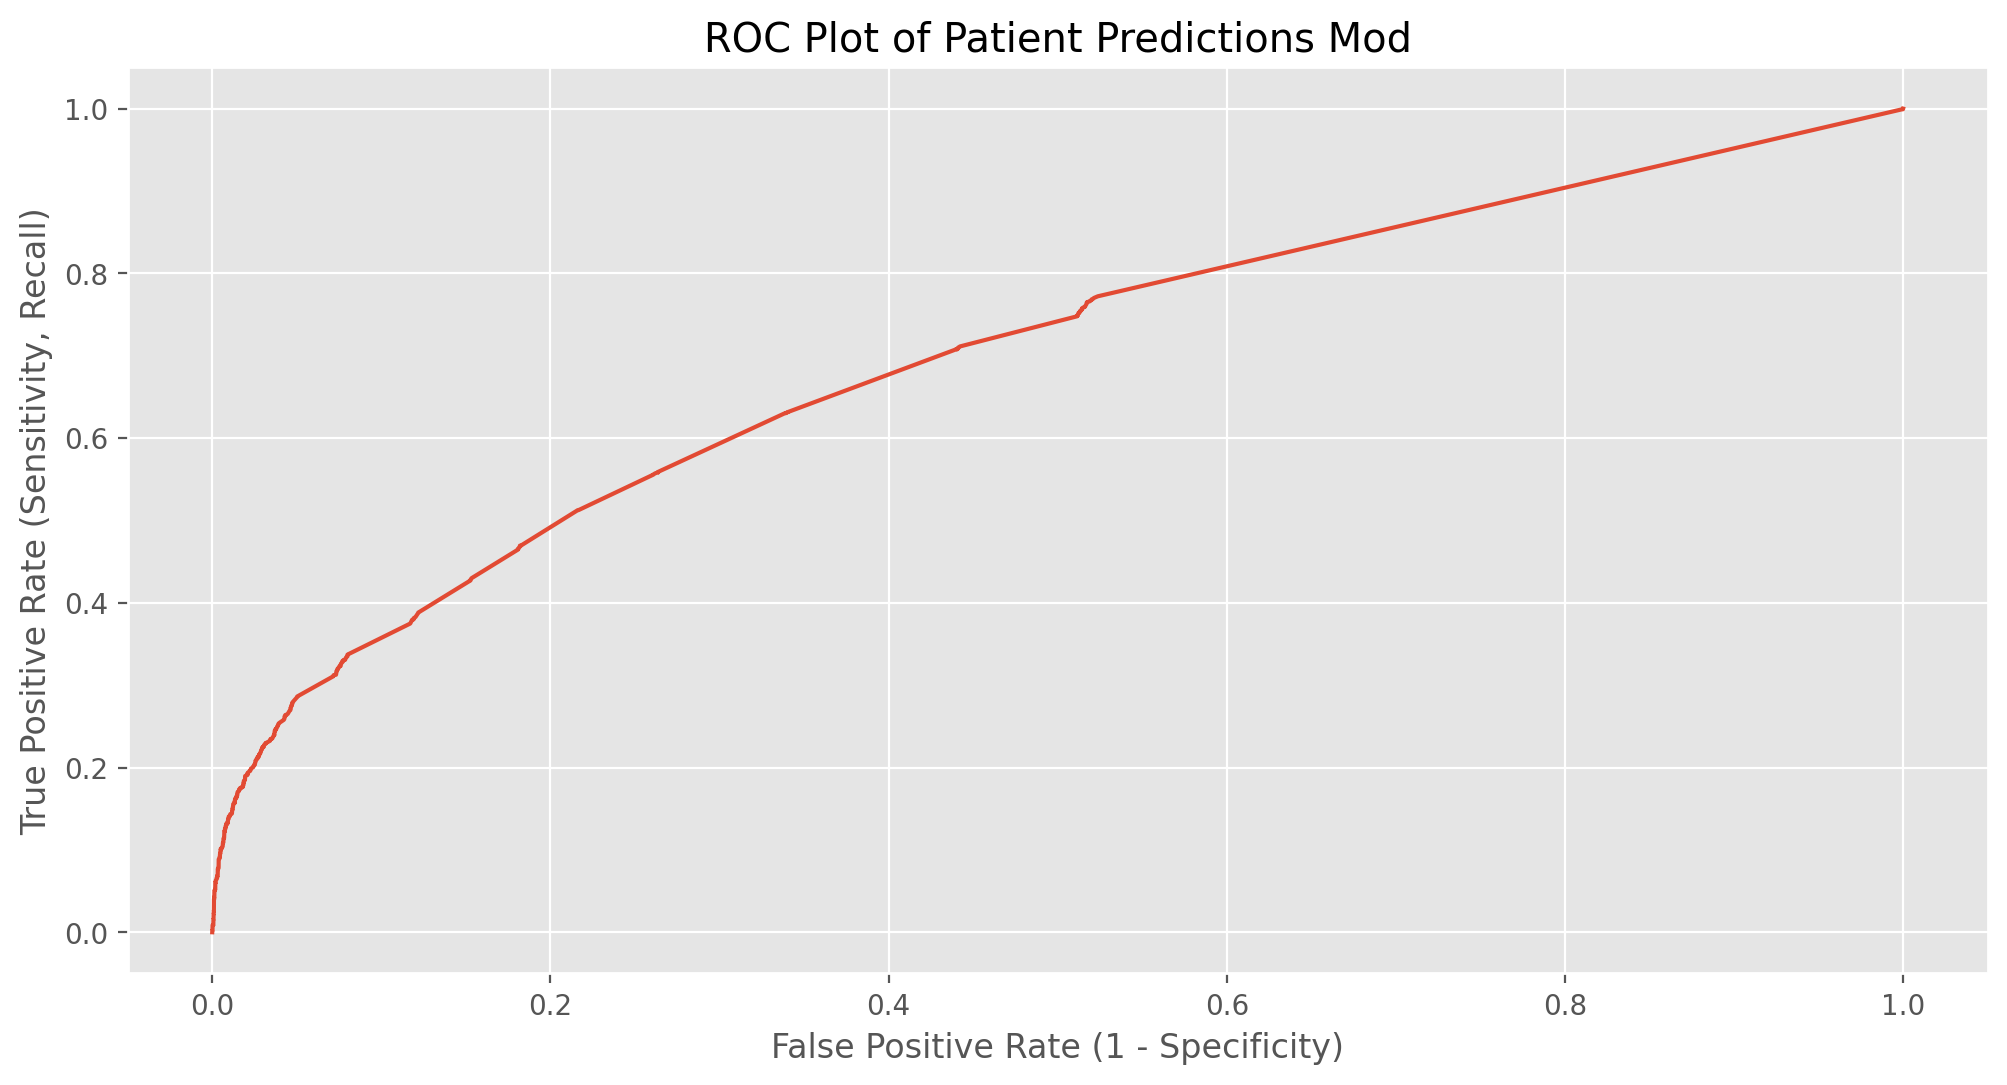

In [63]:

model3 = LogisticRegression(solver='lbfgs')
model3.fit(X_train, y1)
probabilities2 = model3.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(probabilities2, y2)

fig, ax = plt.subplots(figsize=(12, 6))

simple_plot(ax, fpr, tpr, 
            "False Positive Rate (1 - Specificity)", 
            "True Positive Rate (Sensitivity, Recall)", 
            "ROC Plot of Patient Predictions Mod")

In [64]:
'''
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     18506
           1       0.75      0.44      0.56     16743

    accuracy                           0.67     35249
   macro avg       0.69      0.66      0.64     35249
weighted avg       0.69      0.67      0.65     35249
'''

'\n              precision    recall  f1-score   support\n\n           0       0.63      0.87      0.73     18506\n           1       0.75      0.44      0.56     16743\n\n    accuracy                           0.67     35249\n   macro avg       0.69      0.66      0.64     35249\nweighted avg       0.69      0.67      0.65     35249\n'

In [65]:
'''
              precision    recall  f1-score   support

           0       0.73      0.35      0.48     18506
           1       0.54      0.85      0.67     16743

    accuracy                           0.59     35249
   macro avg       0.64      0.60      0.57     35249
weighted avg       0.64      0.59      0.57     35249


'''

'''

eNDOM FOREST 1AM

[[ 9228  9278]
 [ 4058 12685]]
 



'''

'\n\neNDOM FOREST 1AM\n\n[[ 9228  9278]\n [ 4058 12685]]\n \n\n\n\n'

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y1)

RandomForestClassifier(n_estimators=200)

In [67]:
rfc_preds = rfc.predict(X_test)

In [68]:
print(classification_report(y2,rfc_preds) ) 

              precision    recall  f1-score   support

           0       0.69      0.50      0.58     18506
           1       0.58      0.76      0.66     16743

    accuracy                           0.62     35249
   macro avg       0.64      0.63      0.62     35249
weighted avg       0.64      0.62      0.62     35249



In [69]:
print(confusion_matrix(y2,rfc_preds)) 

[[ 9231  9275]
 [ 4053 12690]]


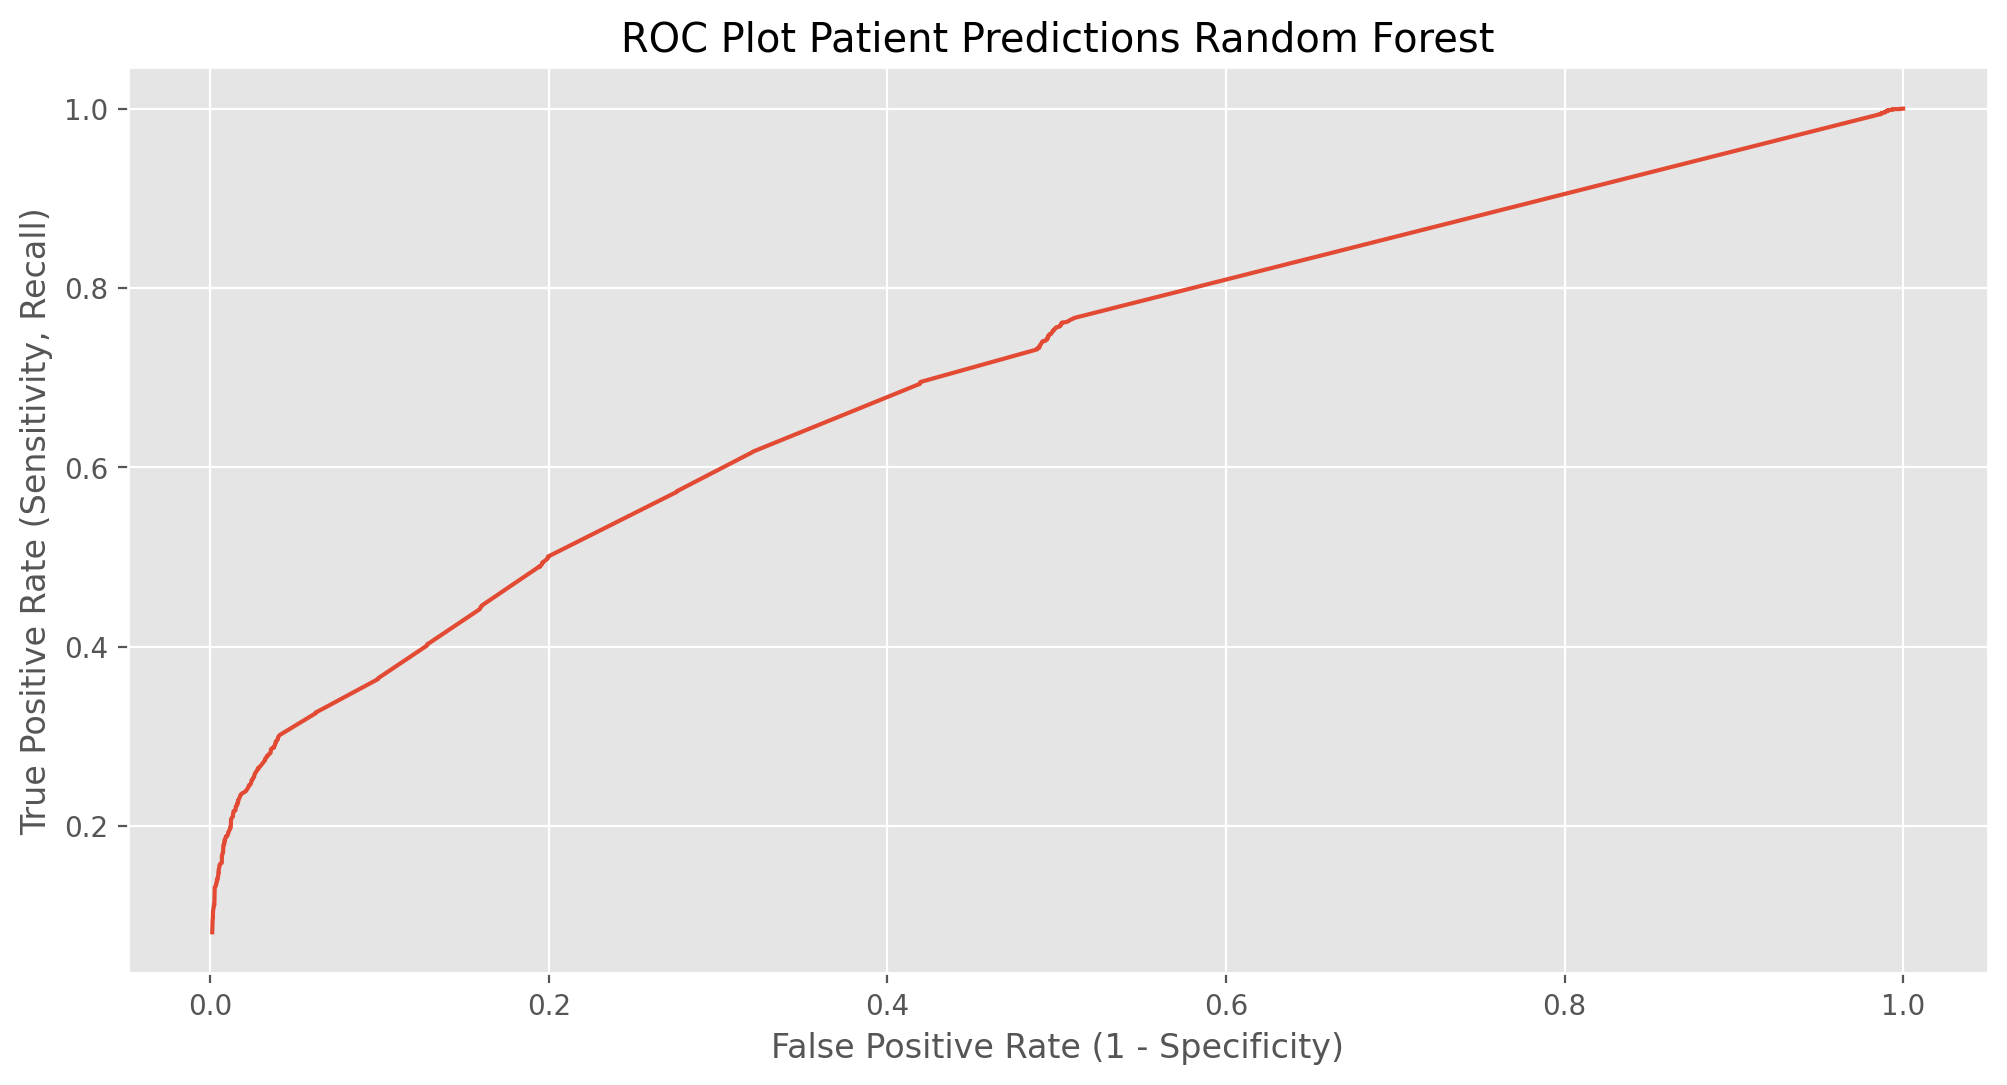

In [70]:
model4 = RandomForestClassifier(n_estimators = 200)
model4.fit(X_train, y1)
proba_Forest = model4.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(proba_Forest, y2)

fig, ax = plt.subplots(figsize=(12, 6))

simple_plot(ax, fpr, tpr, 
            "False Positive Rate (1 - Specificity)", 
            "True Positive Rate (Sensitivity, Recall)", 
            "ROC Plot Patient Predictions Random Forest")

In [71]:
X_train = train1
y_train = y1

In [72]:
X_test = test_df1
y_test= y2

In [73]:
ridge = Ridge(alpha=2.5)
ridge.fit(X_train,y_train)

Ridge(alpha=2.5)

In [74]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [75]:
preds = ridge.predict(X_test)
mse = rss(y_test,preds)
print("MSE for Ridge(alpha=2.5): {:2.2f}".format(mse))

MSE for Ridge(alpha=2.5): 0.24


In [76]:
def cv(X, y, base_estimator, n_folds, random_seed=154):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train, test) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train], y[train]
        X_cv_test, y_cv_test = X[test], y[test]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = clone(base_estimator)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [87]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train.values, y_train.values, 
                                     Ridge(alpha=6), n_folds=n_folds)

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [88]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))

Training CV error: 0.87
Test CV error: 0.87


In [89]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [90]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Ridge, ridge_alphas)

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has

In [91]:
ridge_mean_cv_errors_train = ridge_cv_errors_train.mean(axis=0)
ridge_mean_cv_errors_test = ridge_cv_errors_test.mean(axis=0)

In [92]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)

Text(0, 0.5, 'MSE')

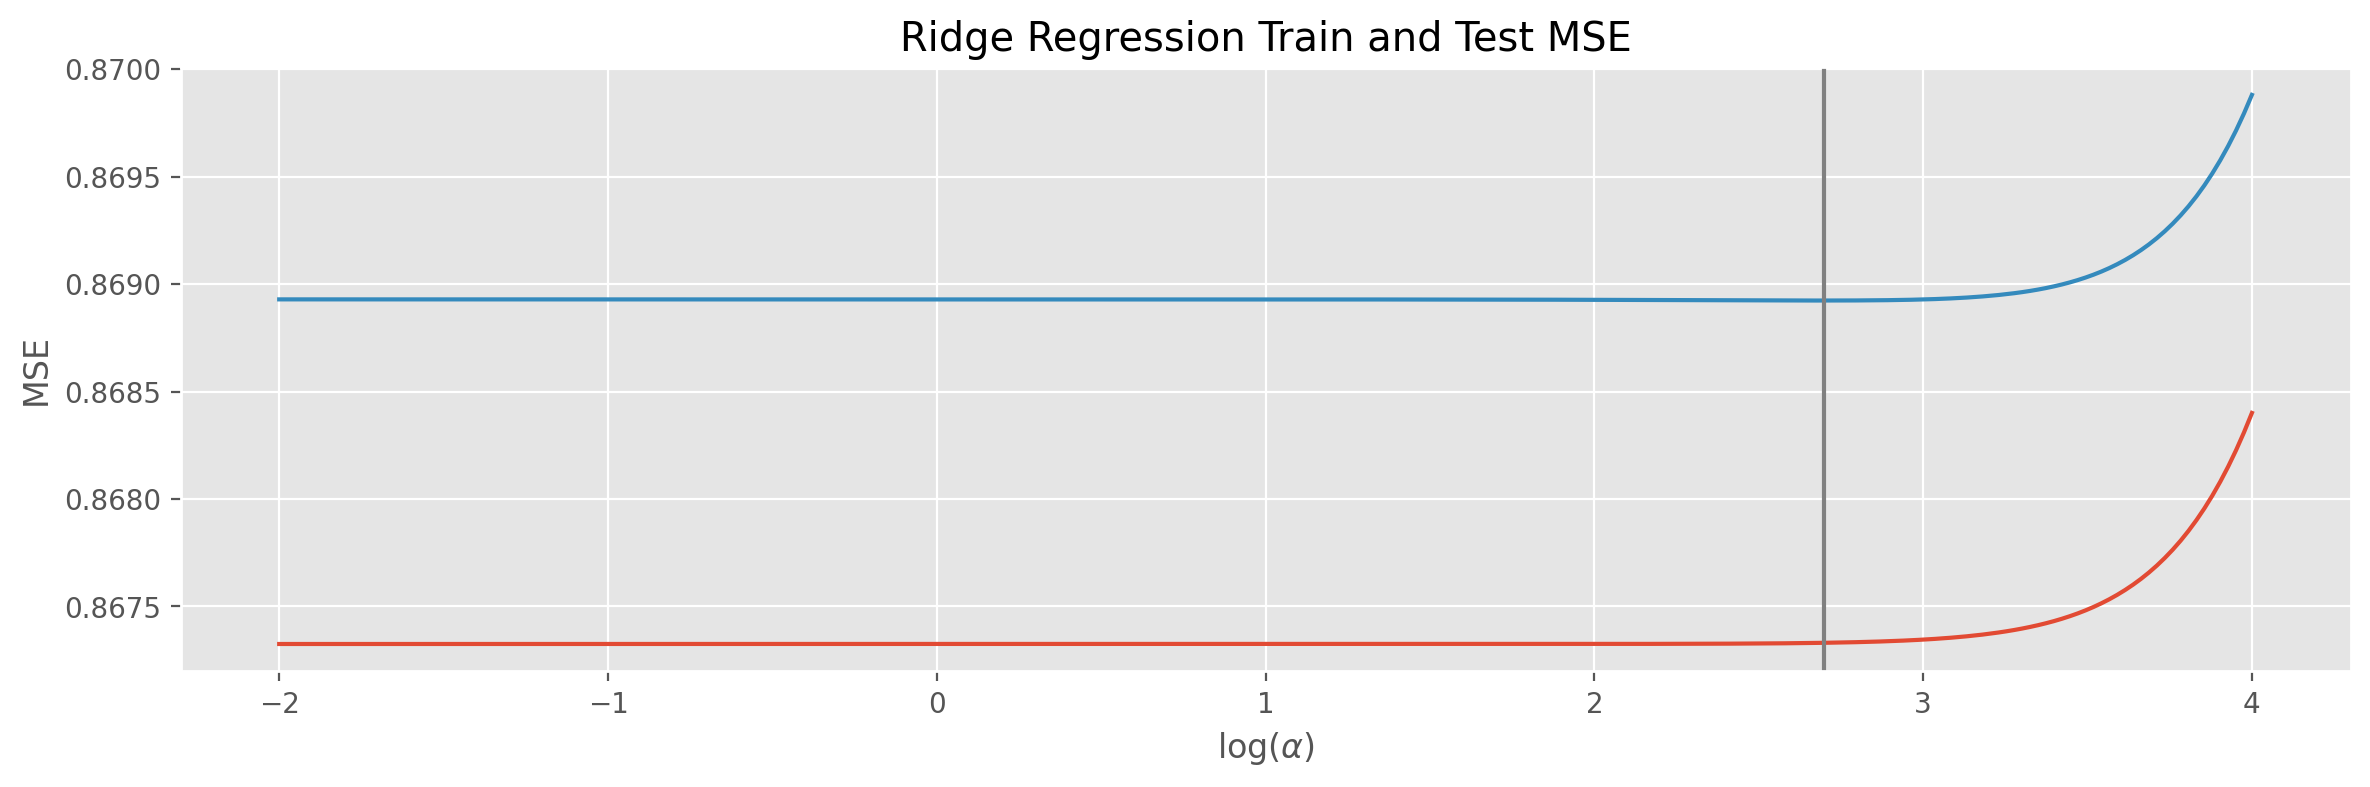

In [93]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_train)
ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_test)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.set_title("Ridge Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")

In [94]:
ridge_models = []

for alpha in ridge_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_std, y_train_std)
    ridge_models.append(ridge)

In [95]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_train.columns))),
                     index=ridge_alphas, columns=X_train.columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

Text(0, 0.5, 'Standardized Coefficient')

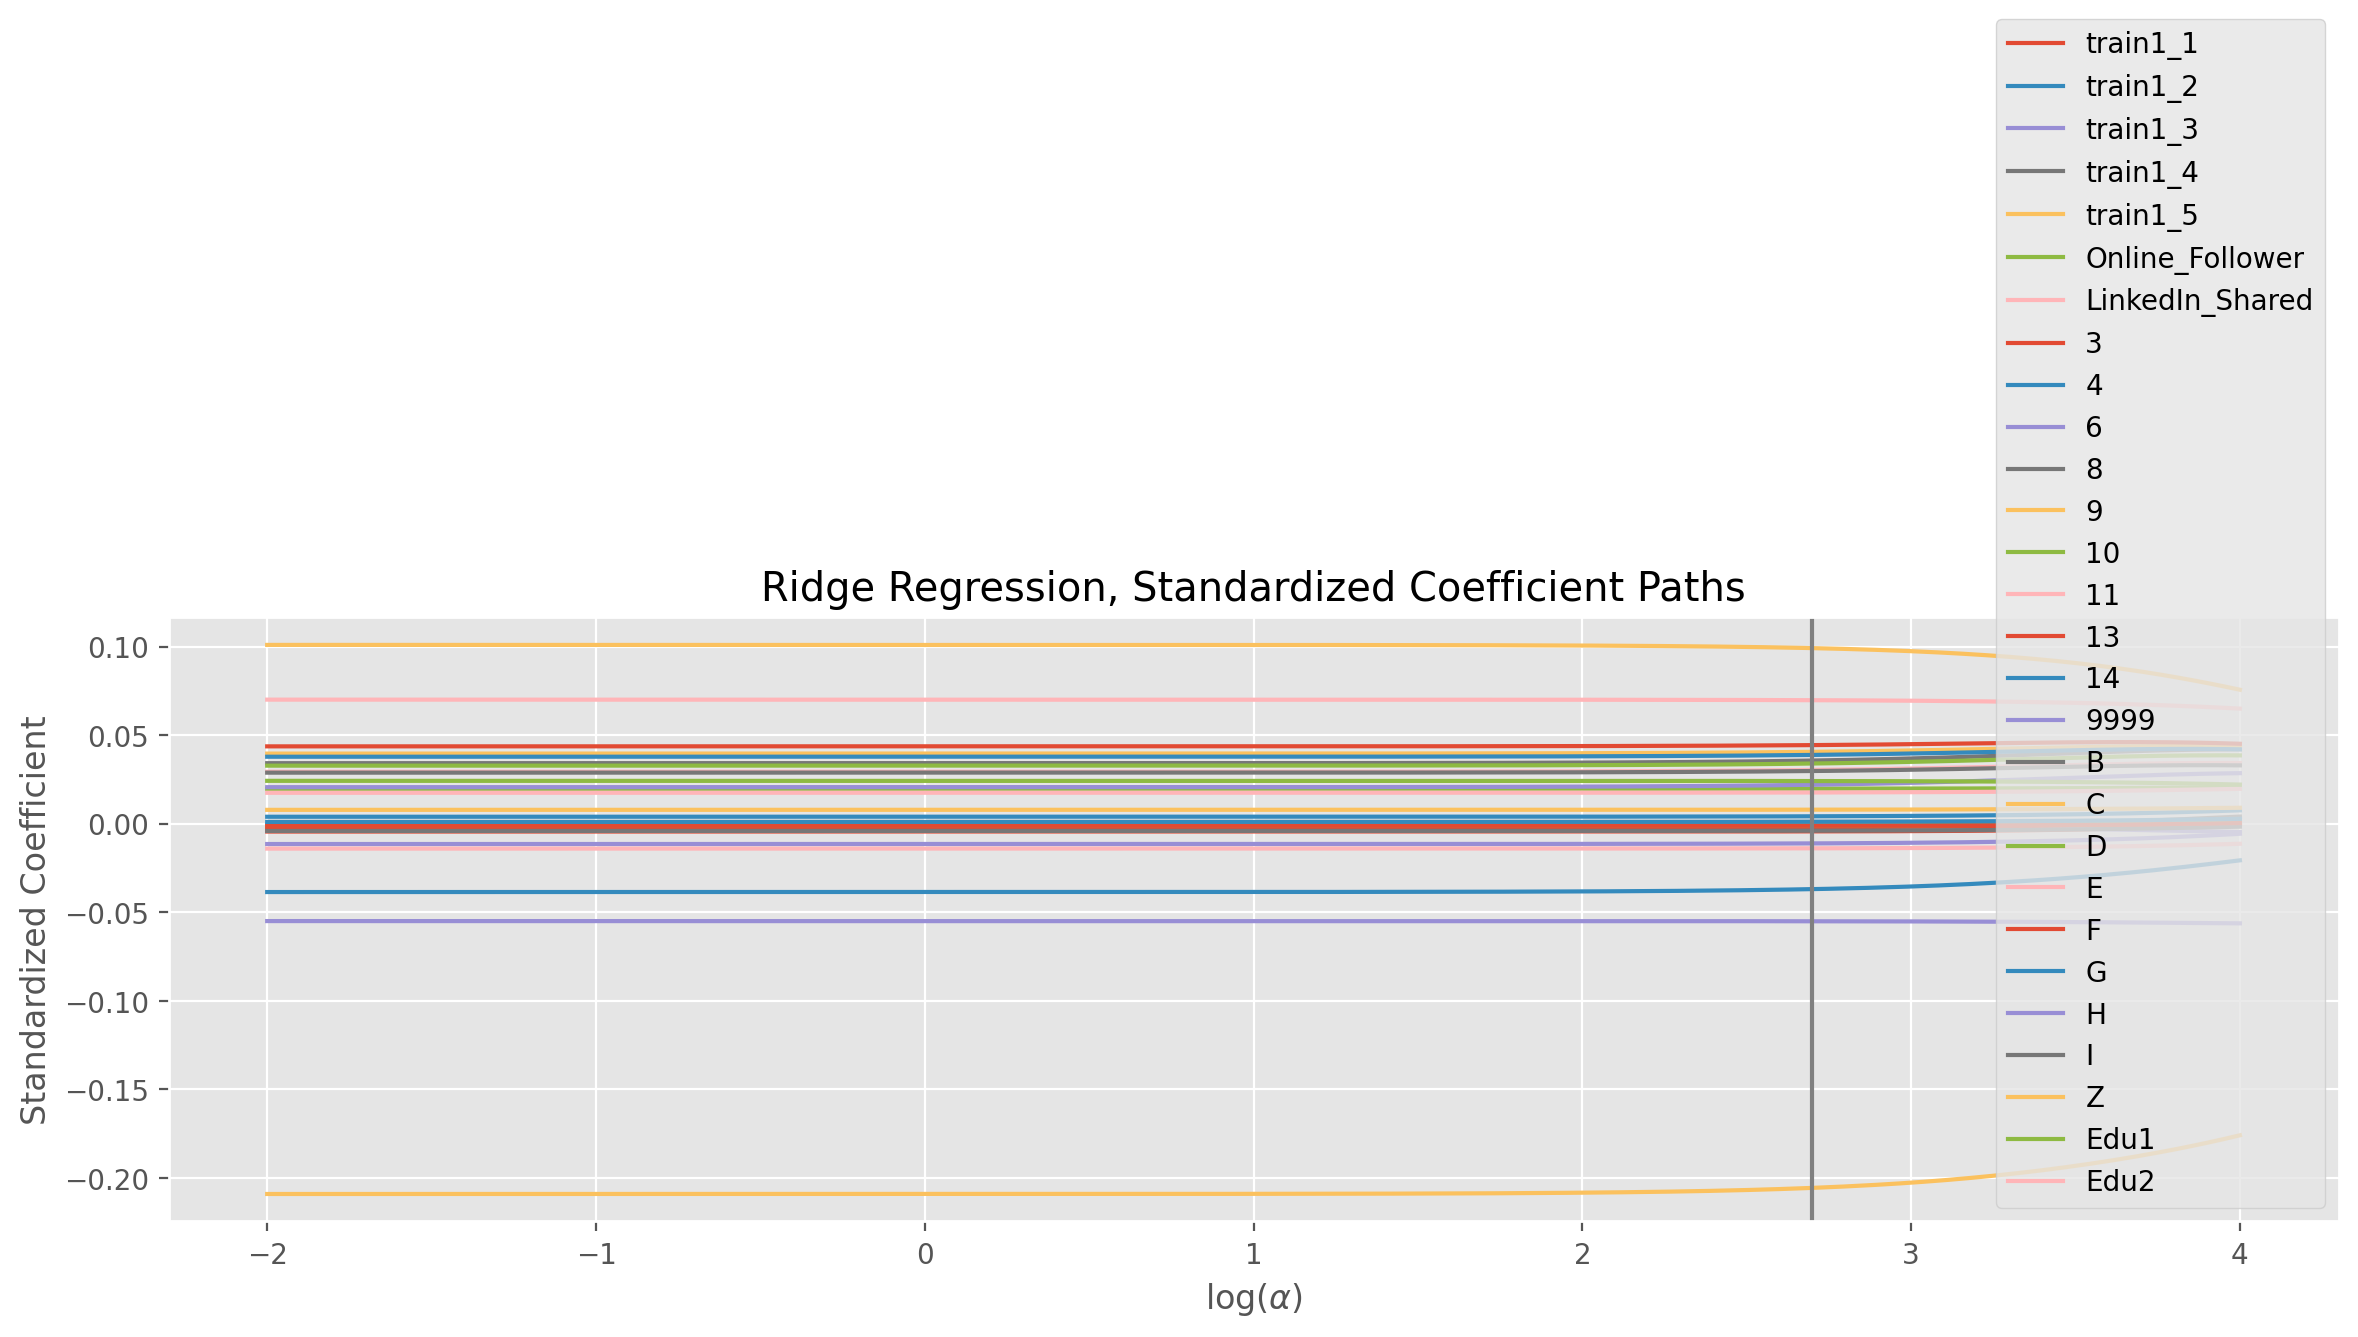

In [96]:
fig, ax = plt.subplots(figsize=(14, 4))

for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")